# Ridge Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

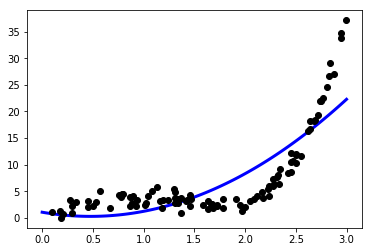

In [5]:
#clf = Ridge(alpha=1.0)
clf = make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=10.0))
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Ridge Regression) oraz klasyczną regresję z różną ilosćią parametrów oraz stopniem wielomianu: 

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [26]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.Ridge(alpha=1.0)))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=1.0)) ))

In [27]:
x_plot = np.vstack(np.linspace(0, 3, 100))

for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

LR
Ridge LR
PR degree 2
Ridge PR degree 2


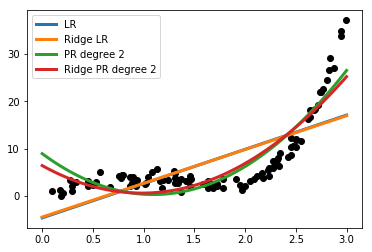

In [28]:
x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
plt.legend()    
plt.show()

In [35]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.Ridge(alpha=1.0)))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(alpha=5.0)) ))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [36]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -4.602188 (0.760037)
Ridge LR: -4.574693 (0.773892)
PR degree 2: -3.047938 (0.736384)
Ridge PR degree 2: -3.299159 (0.587017)


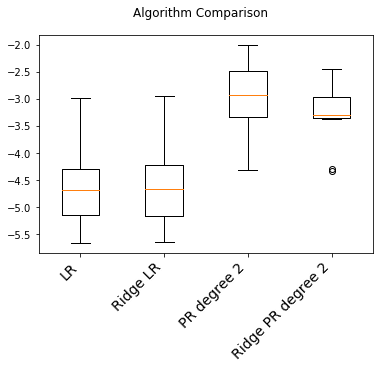

In [37]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)
plt.show()  

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 